c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\SRE\AppData\Local\Temp\ipykernel_12656\1651557929.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu
 in line 557 Sampler after sampling is  tensor([800, 600, 400, 200,   0])
Count is  0


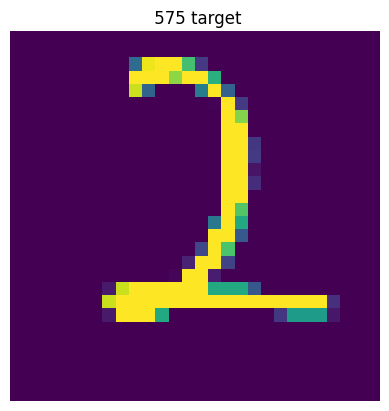

Loss: tensor(0.0325, grad_fn=<NllLossBackward0>)
Before backward, data.grad_fn: None
require grad  True
data.grad is still None after backward


UnboundLocalError: local variable 'data_grad' referenced before assignment

In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Any image 0 to 9"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.55

## SAMPLER

sampler = "ddpm"
num_inference_steps = 5
seed = 42



acc , ex = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    epsilon = 0.3,
)

# Combine the input image and the output image into a single image.
print(acc)

In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Same dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.55

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [6]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Same dog but little difference"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.55

## SAMPLER

sampler = "ddpm"
num_inference_steps = 500
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

C:\Users\SRE\AppData\Local\Temp\ipykernel_15092\65026112.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


 88%|████████▊ | 242/275 [33:47<04:36,  8.38s/it]


KeyboardInterrupt: 

In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch
import numpy as np
import os

# Device setup
DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

# Tokenizer and model loading
tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Text-to-Image generation prompt
prompt = "Same dog but little difference"
uncond_prompt = ""  # Negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

# Image-to-Image setup
input_image = None
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
strength = 0.55

# Sampler settings
sampler = "ddpm"
num_inference_steps = 50
num_images = 10  # Number of images to generate
output_dir = "generated_images"  # Directory to save images
os.makedirs(output_dir, exist_ok=True)

# Loop to generate multiple images
generated_images = []

for i in range(num_images):
    seed = np.random.randint(0, 10000)  # Random seed for each image
    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=uncond_prompt,
        input_image=input_image,
        strength=strength,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )
    
    # Save each generated image to disk
    image_filename = os.path.join(output_dir, f"generated_image_{i+1}.png")
    Image.fromarray(output_image).save(image_filename)
    generated_images.append(image_filename)  # Save file path to list

# Now `generated_images` contains the paths to the images.
# You can pass this list of image paths to the Inception Score calculation function.


C:\Users\SRE\AppData\Local\Temp\ipykernel_15092\3705143543.py:17: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 27/27 [03:43<00:00,  8.27s/it]


In [ ]:
import torch
import numpy as np
from torchvision import models, transforms
from torch import nn
from PIL import Image
import os
import torch.nn.functional as F

# Function to calculate Inception Score for a list of generated images
def calculate_inception_score(image_paths, splits=10):
    # Load the pre-trained Inception V3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).eval()

    # Define the preprocessing transformations for Inception V3 input
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Initialize a list to store predictions
    all_probs = []

    # Loop over all the generated images
    for image_path in image_paths:
        img = Image.open(image_path).convert("RGB")
        img = transform(img).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            pred = inception_model(img)  # Output shape: [1, 1000]
        
        # Apply softmax to get the class probabilities
        prob = F.softmax(pred, dim=1).cpu().numpy()
        all_probs.append(prob)

    # Convert the list to a numpy array of shape [num_images, num_classes]
    all_probs = np.concatenate(all_probs, axis=0)

    # Compute the marginal distribution (mean over all images)
    marginal_probs = np.mean(all_probs, axis=0)

    # Calculate KL divergence for each image
    kl_divergence = np.mean(np.sum(all_probs * (np.log(all_probs) - np.log(marginal_probs)), axis=1))

    # Calculate the Inception Score
    inception_score = np.exp(kl_divergence)

    return inception_score

# List of paths to your generated images (output from previous code)
generated_images = ["generated_images/generated_image_1.png", "generated_images/generated_image_2.png", "generated_images/generated_image_3.png", "generated_images/generated_image_4.png", "generated_images/generated_image_5.png", "generated_images/generated_image_6.png", "generated_images/generated_image_8.png", "generated_images/generated_image_8.png", "generated_images/generated_image_9.png", "generated_images/generated_image_10.png"]  # Example paths

# Compute the Inception Score for the generated images
inception_score_value = calculate_inception_score(generated_images)

# Print the Inception Score
print(f"Inception Score: {inception_score_value}")


Inception Score: 1.6626759767532349


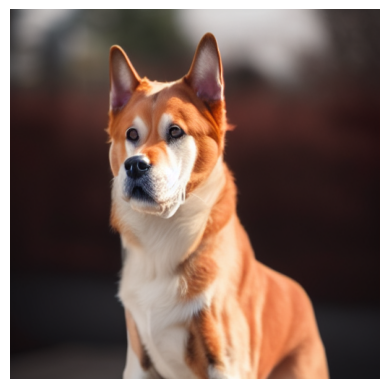

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming `output_image` is a numpy array containing the generated image
generated_image = Image.fromarray(output_image)
plt.imshow(generated_image)
plt.axis('off')  # Turn off axis
plt.show()


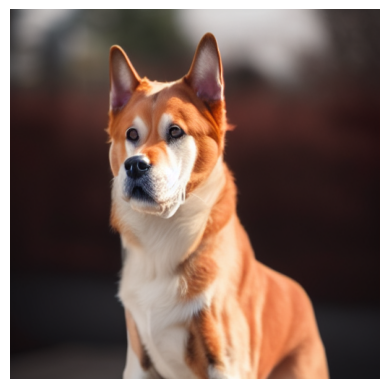

100%|██████████| 1/1 [00:02<00:00,  2.10s/it]

FID: 88.21005027373094


In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_fid import fid_score

# Assuming `output_image` is a numpy array
if isinstance(output_image, Image.Image):
    # If output_image is a PIL Image, convert it to a numpy array
    output_image = np.array(output_image)

# Convert the numpy array to a PIL Image
generated_image = Image.fromarray(output_image)

# Save the generated image to a specified folder
output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)
generated_image.save(os.path.join(output_dir, "generated_image.png"))

# Display the generated image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # Turn off axis
plt.show()

# Path to the real dataset images directory (should be a folder, not a single image file)
real_image_dir = "images"  # Make sure this is a directory containing images

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Calculate FID using pytorch-fid
fid_value = fid_score.calculate_fid_given_paths(
    [real_image_dir, output_dir],
    batch_size=1,
    device=device,
    dims=2048,
    num_workers=1
)

print(f"FID: {fid_value}")


In [6]:
import torch
import os
from torchvision import models, transforms
from torchmetrics.image.inception import InceptionScore
from PIL import Image

# Function to compute Inception Score
def compute_inception_score(image_paths, splits=10):
    # Load pre-trained Inception V3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).eval()

    # Transformation to Inception v3 input size
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    images = [transform(Image.open(path).convert("RGB")) for path in image_paths]
    images = torch.stack(images)

    # Convert to uint8 type (as expected by InceptionScore)
    images = (images * 255).clamp(0, 255).to(torch.uint8)

    # Calculate Inception Score
    is_metric = InceptionScore()
    inception_score = is_metric(images)

    return inception_score

# Usage: Assuming the generated images are saved as .png
generated_image_paths = [os.path.join(output_dir, f) for f in os.listdir(output_dir)]
print(generated_image_paths)
inception_score_value = compute_inception_score(generated_image_paths)
print(f"Inception Score: {inception_score_value}")


['generated_images\\generated_image.png']


c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


Inception Score: (tensor(1.), tensor(nan))


c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\torchmetrics\image\inception.py:177: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1823.)
  return kl.mean(), kl.std()


In [12]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from torch import nn
from PIL import Image
import numpy as np

# Function to compute Inception Score for a single image
def compute_inception_score_single_image(image_path, splits=10):
    # Load pre-trained Inception V3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).eval()

    # Transformation to Inception v3 input size
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load and transform the image
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0)  # Add batch dimension

    # The image is already in float32 format and within [0, 1] after the transform

    # Forward pass through Inception model
    with torch.no_grad():
        pred = inception_model(img)  # Output shape: [1, 1000] (for 1000 ImageNet classes)

    # Apply softmax to get class probabilities
    prob = F.softmax(pred, dim=1).cpu().numpy()

    # Calculate Inception Score
    kl_divergence = np.mean(np.sum(prob * (np.log(prob) - np.log(np.mean(prob, axis=0, keepdims=True))), axis=1))
    inception_score = np.exp(kl_divergence)

    return inception_score

# Path to the image
image_path = "images/dog.jpg"  # Make sure the path is correct

# Compute the Inception Score for the image
inception_score_value = compute_inception_score_single_image(image_path)

# Print the result
print(f"Inception Score: {inception_score_value}")


Inception Score: 1.0


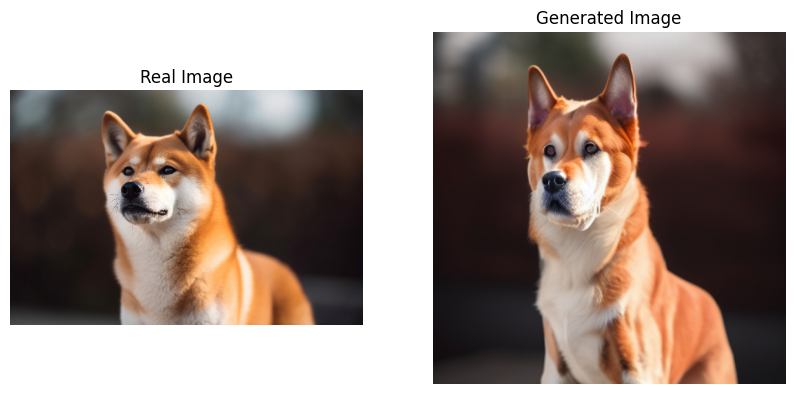

In [15]:
# Compare with a real image
real_image = Image.open("images/dog.jpg")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(real_image)
plt.title("Real Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(generated_image)
plt.title("Generated Image")
plt.axis('off')

plt.show()


In [1]:
import model_loader
import pipeline
from PIL import Image
import torch
import numpy as np
import os
from transformers import CLIPTokenizer

# Device setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Tokenizer and model loading
tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Diverse CIFAR-10 style image generation setup
cifar10_prompts = [
    "A colorful image of a dog",
    "A colorful image of a cat",
    "A colorful image of an airplane",
    "A colorful image of a car",
    "A colorful image of a bird",
    "A colorful image of a truck",
    "A colorful image of a frog",
    "A colorful image of a horse",
    "A colorful image of a ship",
    "A colorful image of a truck"
]

# CIFAR-10 categories (10 different prompts)
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

# Sampler settings (DDPM sampler similar to authors' method)
sampler = "ddpm"
num_inference_steps = 50  # Adjust as needed
num_images = 500  # Number of images to generate for IS calculation
output_dir = "generated_images"  # Directory to save images
os.makedirs(output_dir, exist_ok=True)

# Image generation loop with diverse prompts
generated_images = []
for i in range(num_images):
    # Randomly select a prompt from the list to generate diverse images
    prompt = np.random.choice(cifar10_prompts)
    seed = np.random.randint(0, 10000)
    
    # Generate the image
    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt="",
        input_image=None,
        strength=0.75,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )

    # Save the generated image
    image_filename = os.path.join(output_dir, f"generated_image_{i+1}.png")
    Image.fromarray(output_image).save(image_filename)
    generated_images.append(image_filename)  # Store file path for later evaluation

# Function to calculate Inception Score for a list of generated images
def calculate_inception_score(image_paths, splits=10):
    # Load the pre-trained Inception V3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).eval()

    # Define the preprocessing transformations for Inception V3 input
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Initialize a list to store predictions
    all_probs = []

    # Loop over all the generated images
    for image_path in image_paths:
        img = Image.open(image_path).convert("RGB")
        img = transform(img).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            pred = inception_model(img)  # Output shape: [1, 1000]
        
        # Apply softmax to get the class probabilities
        prob = F.softmax(pred, dim=1).cpu().numpy()
        all_probs.append(prob)

    # Convert the list to a numpy array of shape [num_images, num_classes]
    all_probs = np.concatenate(all_probs, axis=0)

    # Compute the marginal distribution (mean over all images)
    marginal_probs = np.mean(all_probs, axis=0)

    # Calculate KL divergence for each image
    kl_divergence = np.mean(np.sum(all_probs * (np.log(all_probs) - np.log(marginal_probs)), axis=1))

    # Calculate the Inception Score
    inception_score = np.exp(kl_divergence)

    return inception_score

# Compute and print the Inception Score for the generated images
inception_score_value = calculate_inception_score(generated_images)
print(f"Inception Score: {inception_score_value}")


c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


 82%|████████▏ | 41/50 [05:48<01:16,  8.49s/it]


KeyboardInterrupt: 

In [7]:

from torchvision import transforms, models
import model_loader
import pipeline
from PIL import Image
import torch
import numpy as np
import os
from transformers import CLIPTokenizer
import torch.nn.functional as F 

def calculate_inception_score(image_paths, splits=10):
    # Load the pre-trained Inception V3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).eval()

    # Define the preprocessing transformations for Inception V3 input
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Initialize a list to store predictions
    all_probs = []

    # Loop over all the generated images
    for image_path in image_paths:
        img = Image.open(image_path).convert("RGB")
        img = transform(img).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            pred = inception_model(img)  # Output shape: [1, 1000]
        
        # Apply softmax to get the class probabilities
        prob = F.softmax(pred, dim=1).cpu().numpy()
        all_probs.append(prob)

    # Convert the list to a numpy array of shape [num_images, num_classes]
    all_probs = np.concatenate(all_probs, axis=0)

    # Compute the marginal distribution (mean over all images)
    marginal_probs = np.mean(all_probs, axis=0)

    # Calculate KL divergence for each image
    kl_divergence = np.mean(np.sum(all_probs * (np.log(all_probs) - np.log(marginal_probs)), axis=1))

    # Calculate the Inception Score
    inception_score = np.exp(kl_divergence)

    return inception_score

# Compute and print the Inception Score for the generated images
inception_score_value = calculate_inception_score(generated_images)
print(f"Inception Score: {inception_score_value}")

Inception Score: 8.861034393310547


c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


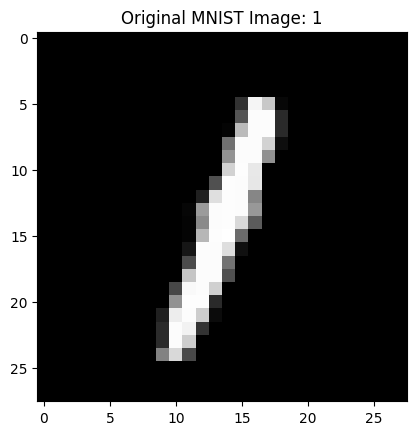

TypeError: Encoder.forward() takes 2 positional arguments but 3 were given

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pipeline
from transformers import CLIPTokenizer
import model_loader

# Define the device for computation (use CUDA if available)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Load the tokenizer and models
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")  # Change to your tokenizer
model_file = "data/v1-5-pruned-emaonly.ckpt"  # Update with the correct model path
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# MNIST DataLoader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ])),
    batch_size=1, shuffle=True)

# Generate Image Function (using pipeline.py logic)
def generate_image(input_image, prompt, models, strength=0.8, sampler_name="ddpm", num_inference_steps=50, seed=42):
    output_image = pipeline.generate(
        input_image=input_image,
        encoder=models['encoder'],
        prompt=prompt,
        strength=strength,
        sampler_name=sampler_name,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        tokenizer=tokenizer,
        fgsm_epsilon=0.1  # FGSM perturbation strength
    )
    return output_image

# Demo to show the whole process
def demo():
    # Get a random MNIST image from the test set
    data_iter = iter(test_loader)
    image, label = next(data_iter)  # Correctly get the next item

    # Show the original image
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Original MNIST Image: {label.item()}")
    plt.axis('off')  # Hide axes
    plt.show()

    # Get the input image in the right format (latent space)
    input_image = image.to(DEVICE)

    # Generate the image using the pipeline after applying FGSM to the latent space
    output_image = generate_image(input_image=input_image, prompt="A hand-written digit", models=models)

    # Convert the output to a PIL Image and display
    output_pil = Image.fromarray(output_image)
    output_pil.show()

# Run the demo
demo()


In [2]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import datasets, transforms

# Assuming your encoder and diffusion models are imported
from encoder import Encoder  # your Encoder model
from diffusion_model import DiffusionModel  # your diffusion model

# Setup device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the necessary transformations for the input image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load a sample image from a dataset (e.g., MNIST, CIFAR)
dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
image, label = dataset[0]

# Visualize the original image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Original Image (Label: {label})")
plt.show()

# Move image to correct device
image = image.unsqueeze(0).to(DEVICE)  # Add batch dimension

# Instantiate the encoder and diffusion models
encoder = Encoder().to(DEVICE)
encoder.eval()

diffusion_model = DiffusionModel().to(DEVICE)  # Assuming DiffusionModel is implemented
diffusion_model.eval()

# Tokenizer for CLIP model (assuming it's part of your pipeline)
from transformers import CLIPTokenizer

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

# Function to generate image using the adversarial latent
def generate_image_with_fgsm(prompt, input_image, encoder, tokenizer, models, device, fgsm_epsilon=0.1):
    # Pass input_image to the pipeline for encoding, FGSM, and diffusion
    generated_image = pipeline.generate(
        prompt=prompt,
        input_image=input_image,
        encoder=encoder,
        tokenizer=tokenizer,
        models=models,
        device=device,
        fgsm_epsilon=fgsm_epsilon
    )
    
    # Convert tensor to image for visualization
    generated_image = generated_image.squeeze().cpu().numpy().astype(np.uint8)
    return Image.fromarray(generated_image)

# Define models dict (contains encoder, diffusion model, etc.)
models = {
    "clip": clip_model,  # Assuming you have a CLIP model loaded
    "diffusion": diffusion_model,
    "encoder": encoder,
}

# Example prompt
prompt = "A drawing of a cat"

# Generate the adversarial image
output_image = generate_image_with_fgsm(prompt, image, encoder, tokenizer, models, DEVICE)

# Display the generated image
output_image.show()


ImportError: cannot import name 'Encoder' from 'encoder' (c:\Users\SRE\rohit\sd\pytorch-stable-diffusion-main\sd\encoder.py)

In [3]:
import torch